In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
len(X_train)

60000

In [36]:
len(X_test)

10000

In [37]:
X_train[0].shape

(28, 28)

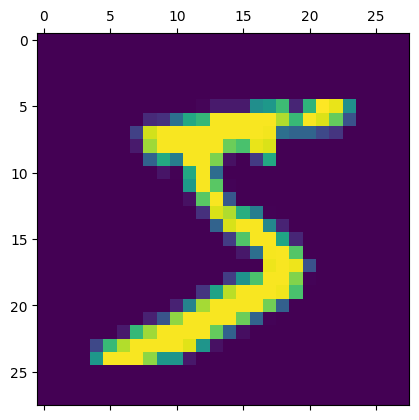

In [38]:
plt.matshow(X_train[0])

In [39]:
y_train[0]

np.uint8(5)

In [40]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [42]:
X_train_flattened.shape

(60000, 784)

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9218 - loss: 0.2754
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9646 - loss: 0.1204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0519


In [49]:
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/fit


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12848), started 0:09:09 ago. (Use '!kill 12848' to kill it.)

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [45]:
model.get_weights()

[array([[-0.0627609 , -0.05581446,  0.00293187, ..., -0.06437684,
          0.06049548,  0.02690261],
        [-0.03191329,  0.05337237, -0.07254528, ..., -0.00846153,
         -0.00322957, -0.01666158],
        [-0.07390414, -0.04340938, -0.05499332, ..., -0.07219104,
          0.03561352,  0.06500621],
        ...,
        [ 0.00732494,  0.06980364,  0.06301931, ..., -0.03243412,
         -0.03938038,  0.04566048],
        [ 0.04336199, -0.0365295 ,  0.0542421 , ...,  0.02900963,
          0.00049465,  0.0203402 ],
        [-0.04590117, -0.0612918 , -0.07002994, ...,  0.02653919,
         -0.08120916, -0.03266274]], shape=(784, 100), dtype=float32),
 array([ 6.51251748e-02,  1.26448005e-01, -6.12019412e-02,  3.50442193e-02,
         1.24742322e-01, -1.97296869e-02,  3.12778577e-02, -6.64854124e-02,
        -2.95250919e-02, -1.40263781e-01,  3.16058956e-02, -5.36914095e-02,
        -2.01330949e-02, -1.64405862e-03, -5.38855270e-02, -1.25110503e-02,
        -2.52935104e-04, -1.12068899